In [13]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os

In [14]:
# Define paths
train_dir = r'D:\Data Science Projects life\Eye-Cataract-Detection\Model\processed_images\train'
test_dir = r'D:\Data Science Projects life\Eye-Cataract-Detection\Model\processed_images\test'

# Data augmentation for training data
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Normalize the pixel values
    rotation_range=20,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest"
)



# Load the training data with augmented images saved
train_generator = train_datagen.flow_from_directory(
    train_dir,  # Specify your train_dir path
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',  # Binary classification
    color_mode='grayscale',  # Grayscale images
    save_to_dir=train_dir,  # Directory to save augmented images
    save_prefix='aug_',  # Prefix for saved images
    save_format='jpeg'  # Format of saved images (you can use 'png' or 'jpeg')
)


# No augmentation for test data, only rescaling
test_datagen = ImageDataGenerator(rescale=1./255)  # Normalize the pixel values

# Load the training and test sets
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',  # Since this is binary classification
    color_mode='rgb'  # Change to 'rgb' instead of 'grayscale'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    color_mode='rgb'  # Change to 'rgb' instead of 'grayscale'
)

Found 491 images belonging to 2 classes.
Found 491 images belonging to 2 classes.
Found 121 images belonging to 2 classes.


In [16]:
# Load the VGG16 model without the top layer
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers of the VGG16 model
for layer in base_model.layers:
    layer.trainable = False

# Build the model
model = Sequential([
    base_model,
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [17]:

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=test_generator,
    validation_steps=test_generator.samples // test_generator.batch_size,
    epochs=10
)

Epoch 1/10


c:\Users\Dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


15/15 ━━━━━━━━━━━━━━━━━━━━ 76s 5s/step - accuracy: 0.5936 - loss: 1.3549 - val_accuracy: 0.8750 - val_loss: 0.2754
Epoch 2/10
 1/15 ━━━━━━━━━━━━━━━━━━━━ 47s 3s/step - accuracy: 0.8750 - loss: 0.3646

c:\Users\Dell\AppData\Local\Programs\Python\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


15/15 ━━━━━━━━━━━━━━━━━━━━ 6s 195ms/step - accuracy: 0.8750 - loss: 0.3646 - val_accuracy: 0.9200 - val_loss: 0.2789
Epoch 3/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 73s 4s/step - accuracy: 0.7914 - loss: 0.4330 - val_accuracy: 0.8438 - val_loss: 0.2704
Epoch 4/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 6s 205ms/step - accuracy: 0.7812 - loss: 0.5009 - val_accuracy: 0.9200 - val_loss: 0.1427
Epoch 5/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 77s 5s/step - accuracy: 0.8056 - loss: 0.4649 - val_accuracy: 0.9375 - val_loss: 0.2035
Epoch 6/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 8s 250ms/step - accuracy: 0.8438 - loss: 0.3477 - val_accuracy: 0.8800 - val_loss: 0.2391
Epoch 7/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 73s 4s/step - accuracy: 0.8444 - loss: 0.3349 - val_accuracy: 0.9375 - val_loss: 0.1571
Epoch 8/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 7s 230ms/step - accuracy: 0.9375 - loss: 0.2310 - val_accuracy: 0.8400 - val_loss: 0.2860
Epoch 9/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 80s 5s/step - accuracy: 0.8901 - loss: 0.2991 - val_accuracy: 0.9479 - val_loss: 0.

In [28]:
loss, accuracy = model.evaluate(test_generator)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

4/4 ━━━━━━━━━━━━━━━━━━━━ 13s 3s/step - accuracy: 0.9414 - loss: 0.1606
Test Accuracy: 94.21%


4/4 ━━━━━━━━━━━━━━━━━━━━ 14s 3s/step - accuracy: 0.9383 - loss: 0.1648
Test Accuracy: 94.21%


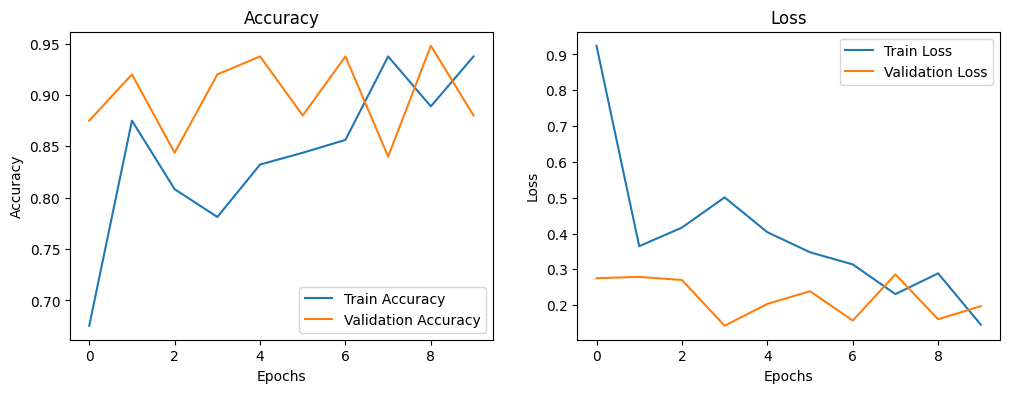

In [18]:

# Evaluate the model
loss, accuracy = model.evaluate(test_generator)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

# Plot accuracy and loss curves
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [27]:
# Prediction function
def predict_image(image_path, model):
    # Load the image
    img_array = cv2.imread(image_path)
    
    # Resize to match the input size of the model
    img_array = cv2.resize(img_array, (224, 224))
    
    # Normalize the pixel values (same as in training)
    img_array = img_array / 255.0
    
    # Reshape to match model input (batch_size, height, width, channels)
    img_array = img_array.reshape(-1, 224, 224, 3)  # VGG16 expects 3 channels
    
    # Make a prediction
    prediction = model.predict(img_array)
    
    # Print the raw prediction output for debugging
    print(f"Raw prediction output: {prediction}")
    
    # Use the threshold to determine the result
    if prediction[0][0] > 0.5:
        return "Non-Cataract"
    else:
        return "Cataract"

# Test the function
image_path = r'D:\Data Science Projects life\Eye-Cataract-Detection\Model\processed_images\test\normal\image_256.png'
prediction = predict_image(image_path, model)
print(f"The model predicts: {prediction}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 341ms/step
Raw prediction output: [[0.8832575]]
The model predicts: Non-Cataract


In [29]:
import pickle as pkl


# Save the model    
with open('Eye_Cataract_VGG16_model.pkl', 'wb') as f:
    pkl.dump(model, f)